###### Mounting the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


######  Installing fastparquet library

In [2]:
# Fastparquet is required for some applications because it provides better performance than the other Python implementations of Parquet.
# It can be up to 10x faster than PyArrow for reading and writing Parquet files.
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00


### Importing the required dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import time
import regex
import string
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [6]:
# Reading the parquet dataset
df = pd.read_parquet('/content/drive/MyDrive/colab/kavida/kavida.ai/query_result_2000.993493Z (1).parquet', engine='fastparquet')

In [ ]:
# Viewing the first location title
df['title'].iloc[0]

'Will the Covid-19 Grinch cancel a Santa rally on the stock markets?'

In [ ]:
# Viewing the first location event_timestamp
df.event_timestamp.iloc[0]

'2021-12-20T12:34:00Z'

In [ ]:
# Viewing the first five rows of the dataset
df.head()

,title,paragraph,news_list,event_timestamp
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,"[""Supplier Market""]",2021-12-20T12:34:00Z
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,"[""Financial Health""]",2021-12-20T12:31:00Z
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,"[""Environmental""]",2021-12-20T12:31:00Z
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,"[""Commodities""]",2021-12-20T12:30:00Z
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,"[""Commodities""]",2021-12-20T12:16:00Z


In [ ]:
# Viewing the bottom five rows of the dataset
df.tail()

,title,paragraph,news_list,event_timestamp
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,"[""Financial Health""]",2021-12-14T01:37:00Z
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,"[""Financial Health""]",2021-12-14T01:33:00Z
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,"[""Commodities""]",2021-12-14T01:28:00Z
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,"[""Environmental""]",2021-12-14T01:26:00Z
1999,Watch now: County executive says omicron has c...,"St. Louis County Executive Sam Page on Monday,...","[""Commodities""]",2021-12-14T01:26:00Z


In [ ]:
# Viewing the shape of the dataset
df.shape

(2000, 4)

In [ ]:
# Viewing the columns of the dataset
df.columns

Index(['title', 'paragraph', 'news_list', 'event_timestamp'], dtype='object')

In [ ]:
# Checking the total number of duplicated values in the dataset
df.duplicated().sum()

13

In [ ]:
# Dropping the duplicates from the dataset
df = df.drop_duplicates()

In [ ]:
# Checking the null values of the dataset
df.isnull().sum()

title              0
paragraph          0
news_list          0
event_timestamp    0
dtype: int64

In [ ]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1987 non-null   object
 1   paragraph        1987 non-null   object
 2   news_list        1987 non-null   object
 3   event_timestamp  1987 non-null   object
dtypes: object(4)
memory usage: 77.6+ KB


In [ ]:
# Using the describe to see some simple stats like count, frequency,etc.
df.describe()

,title,paragraph,news_list,event_timestamp
count,1987,1987,1987,1987
unique,1970,1944,6,1768
top,Twitter @PDChina #omicron,"Welcome to Tuesday, where Omicron now looms ov...","[""Environmental""]",2021-12-16T21:04:00Z
freq,7,5,539,4


In [ ]:
# Using the nunique to count the number of unique values in each feature
df.nunique()

title              1970
paragraph          1944
news_list             6
event_timestamp    1768
dtype: int64

## Data Proprocessing/Cleaning

In [7]:
# Converting the event_timestamp feature into pandas date format
df['date'] = pd.to_datetime(df['event_timestamp'])

In [8]:
# The below code deals with the list value present in the news_list column and it it converting it into only string dtype.
l = []
for i in df['news_list']:
    a = i[2:-2]
    l.append(a)

In [9]:
# Overwriting the values of feature news_list by newly generated data stored in l.
df['news_list'] = l

In [10]:
# Using the unique function to check unique values in news_list
df["news_list"].unique()

array(['Supplier Market', 'Financial Health', 'Environmental',
       'Commodities', 'Compliance', 'Delays'], dtype=object)

In [ ]:
# Checking the count of each items in the news_list feature
df['news_list'].value_counts()

Environmental       539
Commodities         502
Delays              364
Financial Health    302
Compliance          159
Supplier Market     121
Name: news_list, dtype: int64

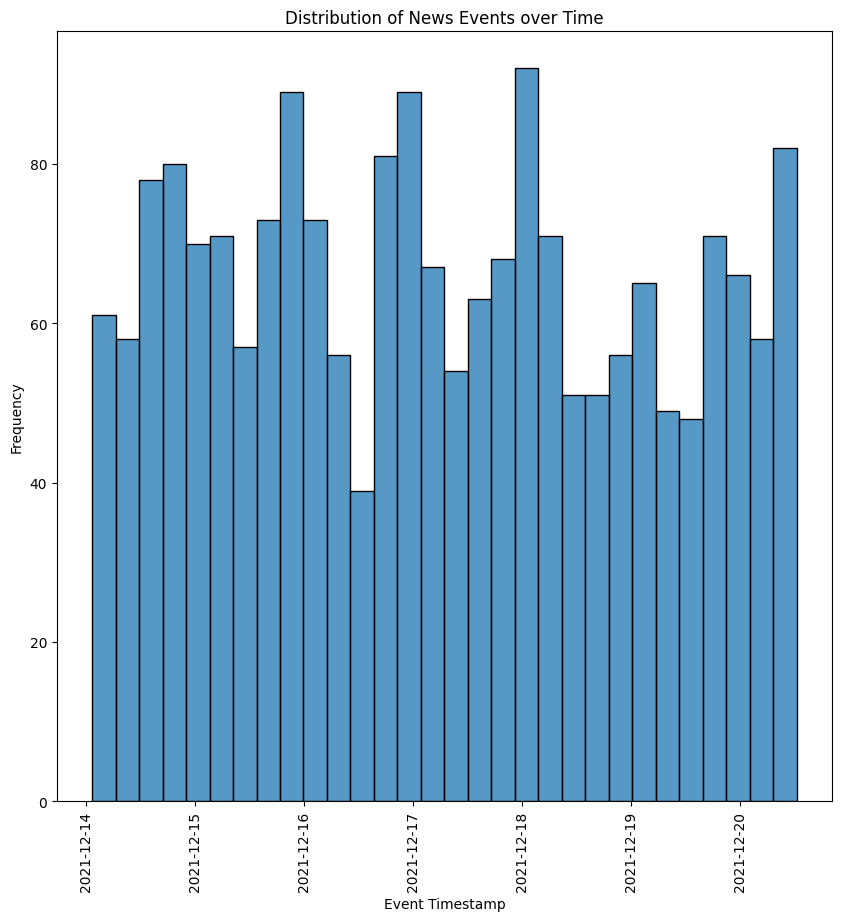

In [ ]:
# Example 2: Distribution of news events over time
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='date', bins=30)
plt.title('Distribution of News Events over Time')
plt.xlabel('Event Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

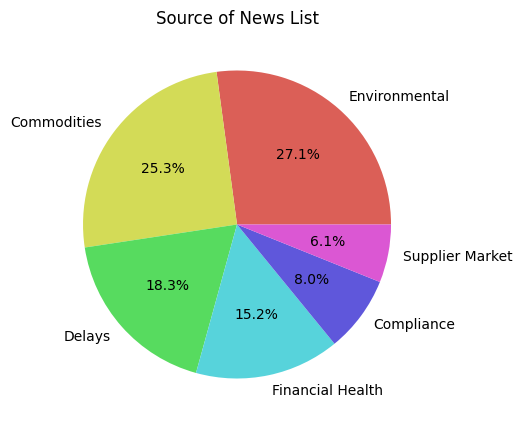

In [ ]:
# Plotting the unique value of the news_list feature using a pie chart
plt.figure(figsize = (5,5))
counts = df['news_list'].value_counts()
plt.pie(counts,labels = counts.index,autopct = "%1.1f%%",colors = sns.color_palette('hls'))
plt.title("Source of News List")
plt.show()

In [ ]:
# Plotting the unique value of the news_list feature using a plotly pie chart
counts = df['news_list'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index,values = counts)])
fig.update_layout(title = "Source of News List")
fig.show()

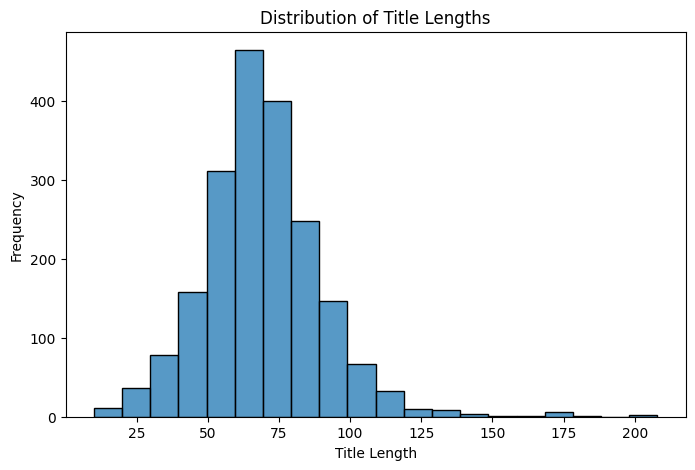

In [ ]:
# Distribution of Title Lengths
df['title_length'] = df['title'].apply(lambda x: len(x))
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='title_length', bins=20)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

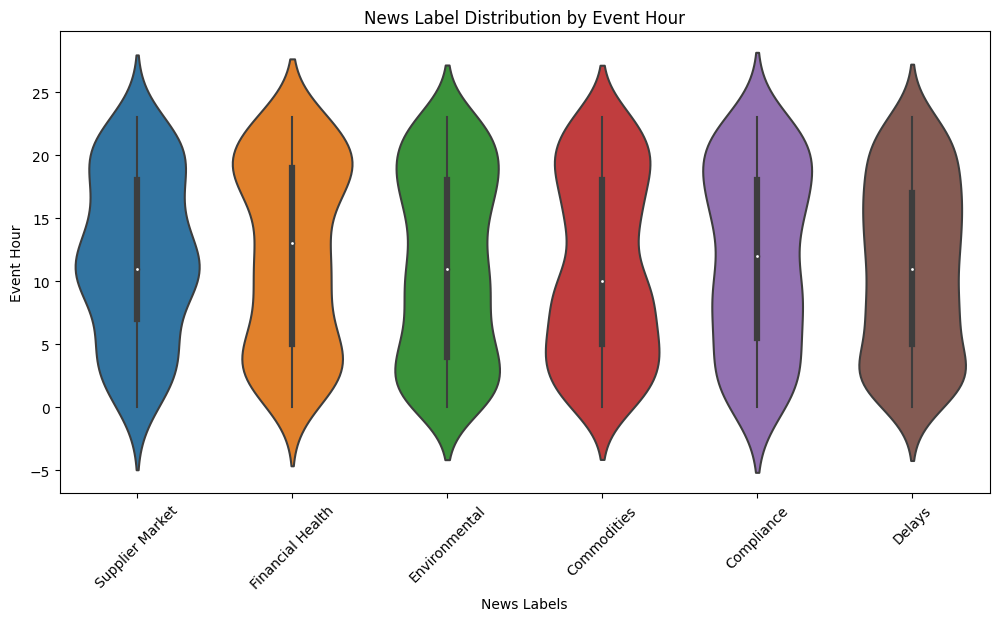

In [ ]:
#News Label Distribution by Event Hour
df['event_hour'] = df['date'].dt.hour
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='news_list', y='event_hour')
plt.title('News Label Distribution by Event Hour')
plt.xlabel('News Labels')
plt.ylabel('Event Hour')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Making the copy of the dataset df and using date to be as an index
df1 = df.copy()
df2 = df1.set_index("date")
df2

,title,paragraph,news_list,event_timestamp
date,,,,
2021-12-20 12:34:00+00:00,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,Supplier Market,2021-12-20T12:34:00Z
2021-12-20 12:31:00+00:00,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,Financial Health,2021-12-20T12:31:00Z
2021-12-20 12:31:00+00:00,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,Environmental,2021-12-20T12:31:00Z
2021-12-20 12:30:00+00:00,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,Commodities,2021-12-20T12:30:00Z
2021-12-20 12:16:00+00:00,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,Commodities,2021-12-20T12:16:00Z
...,...,...,...,...
2021-12-14 01:37:00+00:00,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,Financial Health,2021-12-14T01:37:00Z
2021-12-14 01:33:00+00:00,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,Financial Health,2021-12-14T01:33:00Z
2021-12-14 01:28:00+00:00,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,Commodities,2021-12-14T01:28:00Z


In [ ]:
# Checking the start date and end date,
start_date = df1['date'].min()
end_date  = df1['date'].max()
print("Start date of news :", start_date)
print("End date of news :",end_date)

Start date of news : 2021-12-14 01:26:00+00:00
End date of news : 2021-12-20 12:34:00+00:00


In [ ]:
## Plotting the graph to count how many news_type, paragraph,title comes at each day
week_delta = pd.Timedelta(days = 7)
current_date = start_date
while current_date <= end_date:
    start_week = current_date
    end_week = current_date + week_delta
    current_week_data = df2[(df2.index >= start_week) & (df2.index < end_week)]
    weekly_counts = current_week_data.resample("D").size()
    fig = px.bar(weekly_counts,x = weekly_counts.index,y = weekly_counts.values,
                labels = {"x":"Date","y":"Number of news source title-paragraph"},
                title = f'News Source {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    current_date += week_delta

In [ ]:
# The below code also give the count of how many news_type, paragraph,title comes at each day
daily_counts = df2.resample("D").size()
daily_counts

date
2021-12-14 00:00:00+00:00    299
2021-12-15 00:00:00+00:00    338
2021-12-16 00:00:00+00:00    313
2021-12-17 00:00:00+00:00    309
2021-12-18 00:00:00+00:00    283
2021-12-19 00:00:00+00:00    279
2021-12-20 00:00:00+00:00    166
Freq: D, dtype: int64

##### Cleaning the text

In [12]:
## Making  a copy of the dataset so we can preserve the original dataset
df3 = df1.copy()

In [13]:
# pip install nltk is used to install the Natural Language Toolkit (NLTK) library in Python, which provides
# powerful tools for processing and analyzing human language data, particularly in the field of natural language processing (NLP).
!pip install nltk
nltk.download('stopwords')
stop_list = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# The provided code installs and sets up spaCy,
# a library for natural language processing in Python.
# It downloads the English language model, enabling you to perform various NLP tasks with ease.
!pip install -U spacy
import spacy
import blis
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.6.0 which is incompatible.
2023-07-30 17:46:15.189066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
# Cleaning ,removing - (stopwords,digits,punctuations), tokenizing the text,lemmatizing the text
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*\]','',text).strip()
    text  = re.sub('\S*\d\S*\s*','',text).strip()
    return text.strip()

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

def remove_stopwords(text):
    output = " ".join([i for i in text if i not in stop_list])
    return output

def lemmatizer(text):
  doc = nlp(text)
  sent = [token.lemma_ for token in doc if not token.text in set(stop_list)]
  return ' '.join(sent)

def remove_digits(text):
  clean_text = re.sub(r"\b[0-9]+\b\s*","",text)
  clean_text = " ".join([w for w in text.split() if not w.isdigit()])
  return clean_text

In [16]:
## Applying the clean_text function to clean some unwanted text and stripping
df3["title_new"] = df3['title'].apply(lambda x:clean_text(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:clean_text(x))

## Applying the remove_punctuation function to remove punctuations
df3["title_new"] = df3['title'].apply(lambda x:remove_punctuation(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:remove_punctuation(x))

## Applying the tokenization function to perform tokenization
df3["title_new"] = df3['title'].apply(lambda x:tokenization(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:tokenization(x))

## Applying the remove_stopwords function to remove stopwords from the columns
df3["title_new"] = df3['title'].apply(lambda x:remove_stopwords(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:remove_stopwords(x))


## Applying the lemmatizer function to do lemmatizer operation on the columns
df3["title_new"] = df3['title'].apply(lambda x:lemmatizer(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:lemmatizer(x))

## Applying the lemmatizer function to do remove_digits operation on the columns
df3["title_new"] = df3['title'].apply(lambda x:remove_digits(x))
df3["paragraph_new"] = df3['paragraph'].apply(lambda x:remove_digits(x))

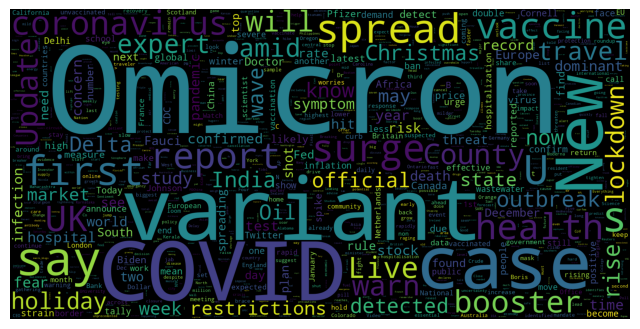

In [17]:
# Shows words of title_new column
data = df3.title_new
plt.figure(figsize = (8,8))
wc = WordCloud(max_words = 1000,width = 1600,height= 800,collocations  = False).generate(" ".join(data))
plt.imshow(wc)
plt.axis("off")
plt.show()

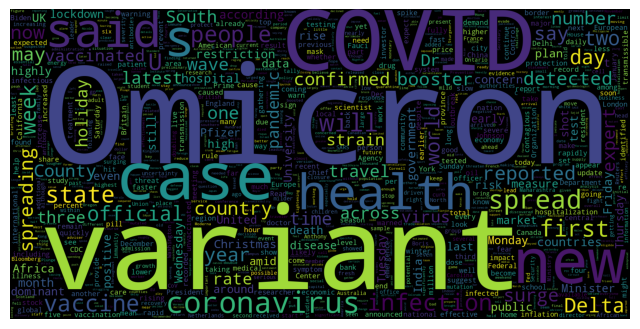

In [ ]:
# Shows words of paragraph_new column
data_1 = df3.paragraph_new
plt.figure(figsize = (8,8))
wc = WordCloud(max_words = 1000,width = 1600,height= 800,collocations  = False).generate(" ".join(data_1))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
df3.news_list.unique().tolist()

['Supplier Market',
 'Financial Health',
 'Environmental',
 'Commodities',
 'Compliance',
 'Delays']

In [ ]:
# Show words for each type of news_list with respect to paragraph_new
for i in df3.news_list.unique().tolist():
  data_1 = df3[df3['news_list']==i]['paragraph_new']
  plt.figure(figsize = (8,8))
  wc = WordCloud(max_words = 500,width = 1600,height= 800,collocations  = False).generate(" ".join(data_1))
  plt.imshow(wc)
  plt.axis("off")
  plt.title(f'The words regarding news_list {i} in paragraph is')
  plt.show()

In [ ]:
# Show words for each type of news_list with respect to title_new
for i in df3.news_list.unique().tolist():
  data_1 = df3[df3['news_list']==i]['title_new']
  plt.figure(figsize = (8,8))
  wc = WordCloud(max_words = 500,width = 1600,height= 800,collocations  = False).generate(" ".join(data_1))
  plt.imshow(wc)
  plt.axis("off")
  plt.title(f'The words regarding news_list {i} in title is')
  plt.show()

In [18]:
### combining the title_new and paragraph_new feature into a single column
df3['combined_text'] = df3['title_new'] + df3['paragraph_new']

In [19]:
#label_encoder = preprocessing.LabelEncoder() is used to transform categorical labels into numerical values, making them usable in machine learning models.
label_encoder =  preprocessing.LabelEncoder()
df3["news_l_e"] = df3['news_list']
df3['news_l_e'] = label_encoder.fit_transform(df3['news_l_e'])

In [20]:
# Storing labelEncoded Values in a y variable
y = df3['news_l_e'].values

In [21]:
# Checking all the unique values in news_l_e feature
df3['news_l_e'].unique()

array([5, 4, 3, 0, 1, 2])

In [22]:
# Mapping all  the news_l_e feature values to a categorical variable
df3['news_l_e_map'] = df3.news_l_e.map({0:"A",1:"B",2:"C",3:"D",4:"E",5:"F"})
dic = {"A":"Commodities","B":"Compliance","C":"Delays","D":"Environmental","E":"Financial Health","F":"Supplier Market"}

In [23]:
# It will print line by line, the news list type, title name and the paragraph name

print("Sample titles:")
for i in range(len(df3)):
  print(f"Title No. is {i+1}:")
  print(f"Title is:",df3['title_new'].iloc[i])
  print("Paragraph is:",df3['paragraph_new'].iloc[i])
  print("News List type is :,")
  print(df3['news_list'].iloc[i])
  print()

Streaming output truncated to the last 5000 lines.
Commodities

Title No. is 1168:
Title is: Omicron expected to impact UK employment
Paragraph is: Our UK employment experts comment on the latest labour market figures and analyse the potential impact of the new Omicron variant. Read more. Joanne…
News List type is :,
Financial Health

Title No. is 1169:
Title is: Workforce stays at home as London's roads are quietest since summer
Paragraph is: England's Omicron ground-zero of London was among the cities much quieter than normal today, hours after Chris Whitty told people to avoid social gatherings that are not important to them.
News List type is :,
Financial Health

Title No. is 1170:
Title is: Hospitals change visitation policies due to omicron
Paragraph is: With more COVID patients in hospitals and the omicron variant spreading, some hospitals are changing their visitor policies.
News List type is :,
Compliance

Title No. is 1171:
Title is: Apple Delays Office Return; Germany Ration

In [ ]:
# News list type
correct_news_list_type = df3['news_list'].value_counts()
print("Distribution of Correct news list type:")
print(correct_news_list_type)
print()

Distribution of Correct news list type:
Environmental       539
Commodities         502
Delays              364
Financial Health    302
Compliance          159
Supplier Market     121
Name: news_list, dtype: int64



In [ ]:
# Common patters observed in title
common_patterns = df3['title'].str.extract(r'(Which|What|How|When|Why|Where)').value_counts()
print("Common Patterns in title: ")
print(common_patterns)
print()

# Common patters observed in paragraph
common_patterns = df3['paragraph'].str.extract(r'(Which|What|How|When|Why|Where)').value_counts()
print("Common Patterns in paragraph: ")
print(common_patterns)
print()

Common Patterns in title: 
What     76
How      37
Why      15
When      5
Where     2
dtype: int64

Common Patterns in paragraph: 
How      15
What     14
When      8
Where     3
Why       2
Which     1
dtype: int64



In [24]:
df3

,title,paragraph,news_list,event_timestamp,date,title_new,paragraph_new,combined_text,news_l_e,news_l_e_map
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,Supplier Market,2021-12-20T12:34:00Z,2021-12-20 12:34:00+00:00,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,Will the Covid-19 Grinch cancel a Santa rally ...,5,F
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,Financial Health,2021-12-20T12:31:00Z,2021-12-20 12:31:00+00:00,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,4,E
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,Environmental,2021-12-20T12:31:00Z,2021-12-20 12:31:00+00:00,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,"Britain reports 10,000 new Omicron cases, ‘maj...",3,D
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,Commodities,2021-12-20T12:30:00Z,2021-12-20 12:30:00+00:00,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,Risk aversion sentiment continues to percolate...,0,A
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,Commodities,2021-12-20T12:16:00Z,2021-12-20 12:16:00+00:00,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,Omicron rush on boosters may make it harder to...,0,A
...,...,...,...,...,...,...,...,...,...,...
1995,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,Financial Health,2021-12-14T01:37:00Z,2021-12-14 01:37:00+00:00,Covid cases rise in the US as Omicron now in o...,Coronavirus infections are increasing in nearl...,Covid cases rise in the US as Omicron now in o...,4,E
1996,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,Financial Health,2021-12-14T01:33:00Z,2021-12-14 01:33:00+00:00,Factbox- banks tighten COVID-19 precautions as...,U.S. banks have been more proactive than other...,Factbox- banks tighten COVID-19 precautions as...,4,E
1997,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,Commodities,2021-12-14T01:28:00Z,2021-12-14 01:28:00+00:00,"New SARS-CoV-2 variant a wake-up call for US, ...",A new variant of SARS-CoV-2 was first isolated...,"New SARS-CoV-2 variant a wake-up call for US, ...",0,A
1998,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,Environmental,2021-12-14T01:26:00Z,2021-12-14 01:26:00+00:00,Five new symptoms of Omicron - and how new var...,The NHS website still asks anyone with the thr...,Five new symptoms of Omicron - and how new var...,3,D


## Vectorize the data

In [25]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df3['combined_text'])
y = df3['news_l_e']

## Train Test Split-  Splitting the dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_balanced,y_balanced = smote.fit_resample(X_train,y_train)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
sv = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()
mb = MultinomialNB()
models = [sv,dt,rf,ad,mb]
accuracies=  []
for model in models:
  print('Results for the model,:',model.__class__.__name__)
  model.fit(X_balanced,y_balanced)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)
  print("Accuracy is:", accuracy)

  cm =  confusion_matrix(y_test,y_pred)
  print('Confusion Matrix:\n',cm)

  report = classification_report(y_test,y_pred)
  print('Classfication report:\n',report)

  accuracies.append(accuracy)

print("List of accuracies:", accuracies)

Results for the model,: SVC
Accuracy is: 0.4975
Confusion Matrix:
 [[73  0  2 19  5  0]
 [21 10  0 12  0  0]
 [21  1 21 21  4  1]
 [33  0  2 78  5  1]
 [22  0  2 10  5  0]
 [10  2  0  5  2 12]]
Classfication report:
               precision    recall  f1-score   support

           0       0.41      0.74      0.52        99
           1       0.77      0.23      0.36        43
           2       0.78      0.30      0.44        69
           3       0.54      0.66      0.59       119
           4       0.24      0.13      0.17        39
           5       0.86      0.39      0.53        31

    accuracy                           0.50       400
   macro avg       0.60      0.41      0.43       400
weighted avg       0.57      0.50      0.48       400

Results for the model,: DecisionTreeClassifier
Accuracy is: 0.4675
Confusion Matrix:
 [[51  6  6 23 11  2]
 [10 15  4  6  4  4]
 [ 9  2 41  8  7  2]
 [42  5  8 52 11  1]
 [11  2  6 11  8  1]
 [ 3  1  2  3  2 20]]
Classfication report:
     

In [ ]:
## Here we can see random forest is providing maximum accuracy
# Accuracy rationale is used here as accuracy score